In [1]:
#imports
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np

In [2]:
# Read the Excel files into a DataFrame, skip the first row (model names)
LR_Acc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Acc_Matplotlib.xlsx', skiprows=1)
LR_Mcc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_LR_Mcc_Matplotlib.xlsx', skiprows=1)
RF_Acc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Acc_Matplotlib.xlsx', skiprows=1)
RF_Mcc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_RF_Mcc_Matplotlib.xlsx', skiprows=1)
SVM_Acc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Acc_Matplotlib.xlsx', skiprows=1)
SVM_Mcc = pd.read_excel('../5) Analysis/SMOTE vs Non-SMOTE/All_Data_SVM_Mcc_Matplotlib.xlsx', skiprows=1)

In [3]:
Acc = {
    0:LR_Acc,
    1:RF_Acc,
    2:SVM_Acc,
}

Mcc = {
    0:LR_Mcc,
    1:RF_Mcc,
    2:SVM_Mcc,
}

model_names = {
    0:'Logistic Regression',
    1:'Random Forest',
    2:'Support Vector Machine',
}

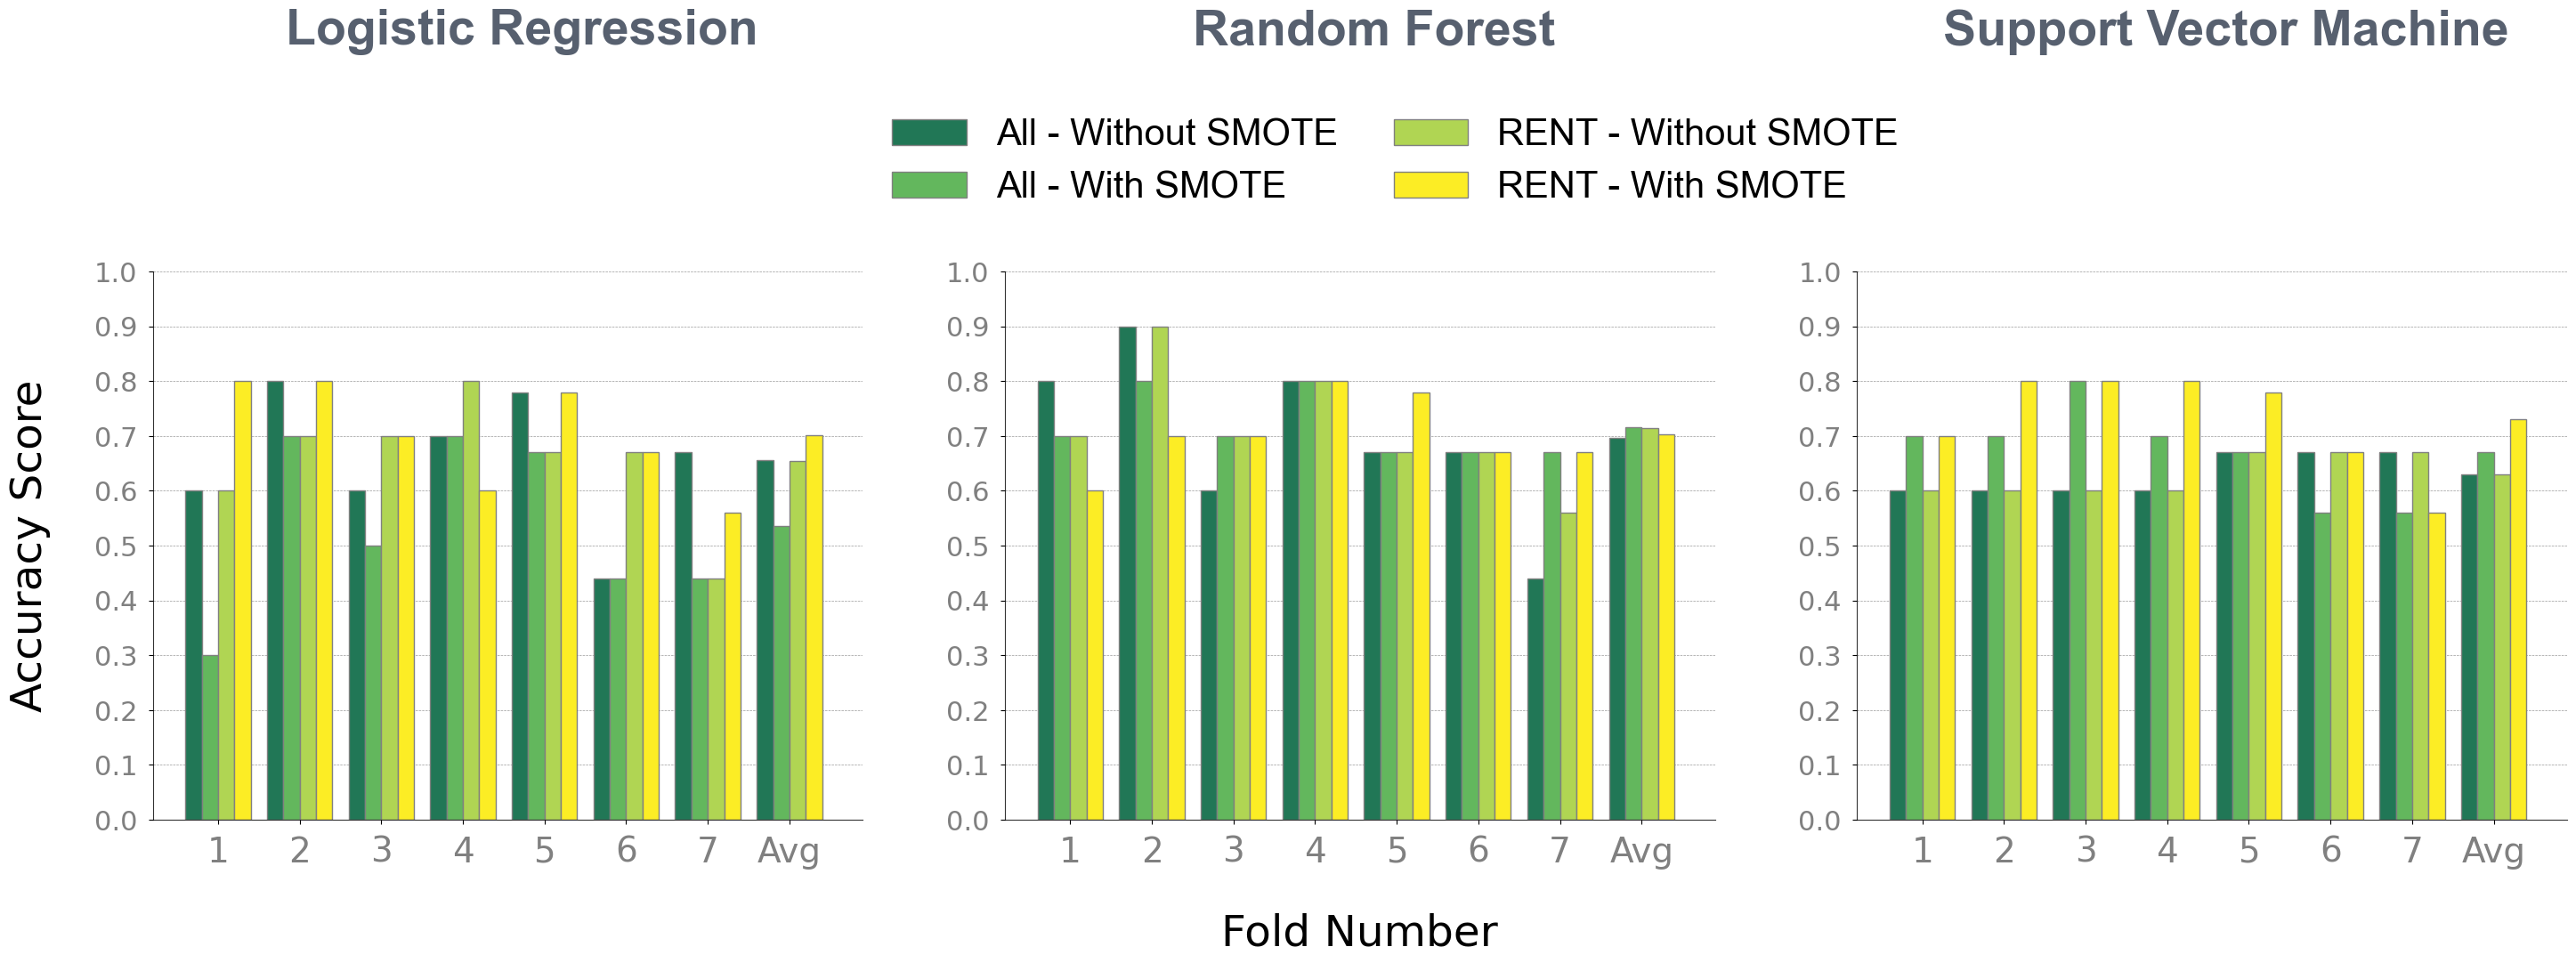

In [4]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(1,3, figsize=(35, 8))

# set width of bar
barWidth = 0.2

for j in range(0,3):
    
    All_Without = []
    All_With = []
    RENT_Without = []
    RENT_With = []
    
    for i in range(8):    
        
        fold_values = Acc[j][Acc[j]['Fold'] == i+1]
        
        if j == 0: # For Logistic Regression
            TAU_03 = fold_values[fold_values['TAU_VALUE'] == 0.3]
            TAU_08 = fold_values[fold_values['TAU_VALUE'] == 0.8]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_03['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_03['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_08['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_03['With_SMOTE'].tolist())
        
        if j == 1: # For Random Forest
            TAU_02 = fold_values[fold_values['TAU_VALUE'] == 0.2]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_02['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_02['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_02['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_02['With_SMOTE'].tolist())
            
        if j == 2: # For SVM
            TAU_04 = fold_values[fold_values['TAU_VALUE'] == 0.4]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_04['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_04['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_04['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_04['With_SMOTE'].tolist())
            
    if j == 0:
        fold_values = Acc[j][Acc[j]['Fold'] == j+1]
        TAU_03 = fold_values[fold_values['TAU_VALUE'] == 0.3]
        TAU_08 = fold_values[fold_values['TAU_VALUE'] == 0.8]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_03['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_03['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_08['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_03['RENT_Avg_With_SMOTE'].tolist())
    
    if j == 1:
        fold_values = Acc[j][Acc[j]['Fold'] == j+1]
        TAU_02 = fold_values[fold_values['TAU_VALUE'] == 0.2]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_02['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_02['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_02['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_02['RENT_Avg_With_SMOTE'].tolist())
        
    if j == 2:
        fold_values = Acc[j][Acc[j]['Fold'] == j+1]
        TAU_04 = fold_values[fold_values['TAU_VALUE'] == 0.4]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_04['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_04['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_04['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_04['RENT_Avg_With_SMOTE'].tolist())
            
    All_Without = [item for sublist in All_Without for item in sublist]
    All_With = [item for sublist in All_With for item in sublist]
    RENT_Without = [item for sublist in RENT_Without for item in sublist]
    RENT_With = [item for sublist in RENT_With for item in sublist]
    labels = ['All - Without SMOTE', 'All - With SMOTE', 'RENT - Without SMOTE', 'RENT - With SMOTE']

    # Set position of bar on X axis
    br1 = np.arange(len(All_Without))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    ax[j].bar(br1, All_Without, align='center', color ='#217756', width = barWidth, edgecolor ='grey', label =labels[0])
    ax[j].bar(br2, All_With, align='center', color ='#63B75D', width = barWidth, edgecolor ='grey', label =labels[1])
    ax[j].bar(br3, RENT_Without, align='center', color ='#B0D553', width = barWidth, edgecolor ='grey', label =labels[2])
    ax[j].bar(br4, RENT_With, align='center', color ='#FCED25', width = barWidth, edgecolor ='grey', label =labels[3])

    # Adding Ax ticks and labels
    ax[j].set_xlim([-0.5, 8.2])
    ax[j].set_xticks([r + barWidth + 0.1 for r in range(len(All_Without))], ['1', '2', '3', '4', '5', '6', '7', 'Avg'], fontsize=28)
    ax[j].set_ylim([0.0, 1.0])
    ax[j].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                     ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=22.0)
    ax[j].tick_params(axis='both', which='major', pad=9, labelcolor='gray', grid_color='gray', grid_alpha=0.8)
    ax[j].margins(x=10)
    ax[j].grid(axis='y', linestyle='--', linewidth=0.5)
    ax[j].set_axisbelow(True)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_alpha(0.8)
    ax[j].spines['bottom'].set_alpha(0.8)
    ax[j].set_title(f'{model_names[j]}', x=0.52, y=1.4, color='#57606f', 
                    fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'40'})

    if j == 0:
        ax[j].set_ylabel('Accuracy Score', labelpad=35, fontsize = 35)

    if j == 1 :
        ax[j].set_xlabel('Fold Number', labelpad=35, fontsize=35.0)
        ax[j].legend(loc='upper center', frameon=False, facecolor='gray', prop={'family':'Arial', 'size':'30'}, columnspacing=1.5, ncols=2, markerscale=1.5, 
                     bbox_to_anchor=(-0.2, 0.84, 1.5, 0.5))
    

# Adding Plot's ticks and labels
plt.subplots_adjust(hspace=0.5)

plt.savefig(f'BarChart_ACC.png', bbox_inches='tight')
plt.show()

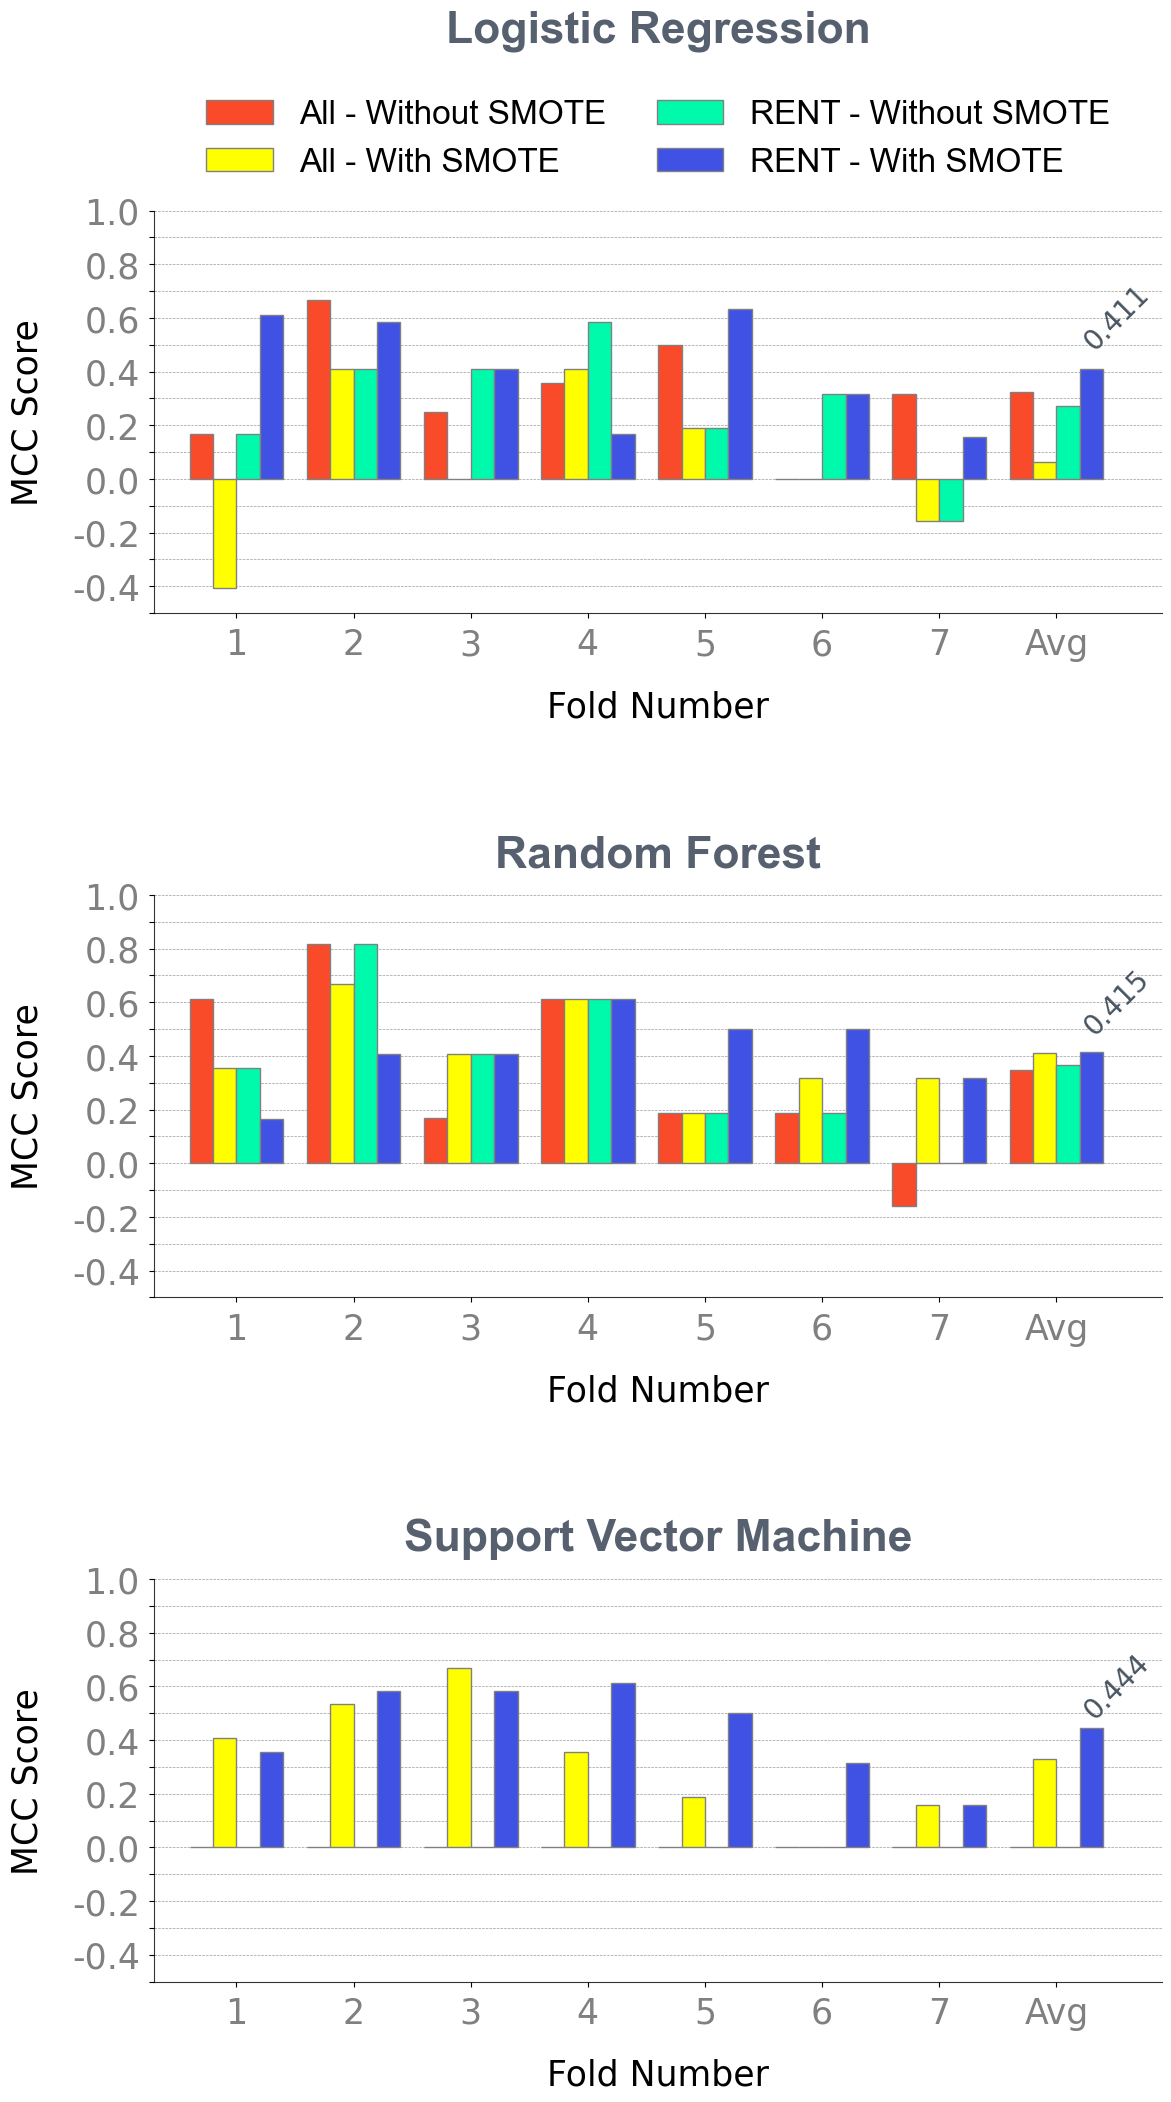

In [13]:
# Iterate through the Acc dictionary to create plots

# Create figure and axes
fig, ax = plt.subplots(3,1, figsize=(13, 23))

# set width of bar
barWidth = 0.2

for j in range(0,3):
    
    All_Without = []
    All_With = []
    RENT_Without = []
    RENT_With = []
    
    for i in range(8):    
        
        fold_values = Mcc[j][Mcc[j]['Fold'] == i+1]
        
        if j == 0: # For Logistic Regression
            TAU_03 = fold_values[fold_values['TAU_VALUE'] == 0.3]
            TAU_08 = fold_values[fold_values['TAU_VALUE'] == 0.8]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_03['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_03['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_08['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_03['With_SMOTE'].tolist())
        
        if j == 1: # For Random Forest
            TAU_02 = fold_values[fold_values['TAU_VALUE'] == 0.2]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_02['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_02['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_02['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_02['With_SMOTE'].tolist())
            
        if j == 2: # For SVM
            TAU_04 = fold_values[fold_values['TAU_VALUE'] == 0.4]

            # Collect scores for ALL Features Without SMOTE 
            All_Without.append(TAU_04['All_without'].tolist())

            # Collect scores for ALL Features With SMOTE 
            All_With.append(TAU_04['All_with'].tolist())

            # Collect scores for RENT Features Without SMOTE 
            RENT_Without.append(TAU_04['Without_SMOTE'].tolist())

            # Collect scores for RENT Features With SMOTE 
            RENT_With.append(TAU_04['With_SMOTE'].tolist())
            
    if j == 0:
        fold_values = Mcc[j][Mcc[j]['Fold'] == j+1]
        TAU_03 = fold_values[fold_values['TAU_VALUE'] == 0.3]
        TAU_08 = fold_values[fold_values['TAU_VALUE'] == 0.8]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_03['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_03['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_08['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_03['RENT_Avg_With_SMOTE'].tolist())
        
        RENT_Avg_With_SMOTE = TAU_03['RENT_Avg_With_SMOTE'].tolist()
    
    if j == 1:
        fold_values = Mcc[j][Mcc[j]['Fold'] == j+1]
        TAU_02 = fold_values[fold_values['TAU_VALUE'] == 0.2]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_02['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_02['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_02['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_02['RENT_Avg_With_SMOTE'].tolist())
        
        RENT_Avg_With_SMOTE = TAU_02['RENT_Avg_With_SMOTE'].tolist()
        
    if j == 2:
        fold_values = Mcc[j][Mcc[j]['Fold'] == j+1]
        TAU_04 = fold_values[fold_values['TAU_VALUE'] == 0.4]

        # Collect scores for ALL Features Without SMOTE 
        All_Without.append(TAU_04['All_Avg_Without_SMOTE'].tolist())

        # Collect scores for ALL Features With SMOTE 
        All_With.append(TAU_04['All_Avg_With_SMOTE'].tolist())

        # Collect scores for RENT Features Without SMOTE 
        RENT_Without.append(TAU_04['RENT_Avg_Without_SMOTE'].tolist())

        # Collect scores for RENT Features With SMOTE 
        RENT_With.append(TAU_04['RENT_Avg_With_SMOTE'].tolist())
        
        RENT_Avg_With_SMOTE = TAU_04['RENT_Avg_With_SMOTE'].tolist()
            
    All_Without = [item for sublist in All_Without for item in sublist]
    All_With = [item for sublist in All_With for item in sublist]
    RENT_Without = [item for sublist in RENT_Without for item in sublist]
    RENT_With = [item for sublist in RENT_With for item in sublist]
    labels = ['All - Without SMOTE', 'All - With SMOTE', 'RENT - Without SMOTE', 'RENT - With SMOTE']

    # Set position of bar on X axis
    br1 = np.arange(len(All_Without))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    ax[j].bar(br1, All_Without, align='center', color ='#F94A29', width = barWidth, edgecolor ='grey', label =labels[0])
    ax[j].bar(br2, All_With, align='center', color ='#FFFF00', width = barWidth, edgecolor ='grey', label =labels[1])
    ax[j].bar(br3, RENT_Without, align='center', color ='#00FAAC', width = barWidth, edgecolor ='grey', label =labels[2])
    ax[j].bar(br4, RENT_With, align='center', color ='#3F52E3', width = barWidth, edgecolor ='grey', label =labels[3])

    # Adding Ax ticks and labels
    ax[j].set_xlim([-0.4, 8.2])
    ax[j].set_xticks([r + barWidth + 0.1 for r in range(len(All_Without))], ['1', '2', '3', '4', '5', '6', '7', 'Avg'], fontsize=25)
    ax[j].set_ylim([0.0, 1.0])
    ax[j].set_yticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
                     ['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                     fontsize=25.0)
    ax[j].tick_params(axis='both', which='major', pad=7, labelcolor='gray', grid_color='gray', grid_alpha=0.8)
    ax[j].margins(x=10)
    ax[j].grid(axis='y', linestyle='--', linewidth=0.5)
    ax[j].set_axisbelow(True)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].spines['left'].set_alpha(0.8)
    ax[j].spines['bottom'].set_alpha(0.8)
    
    for label in ax[j].yaxis.get_ticklabels()[::2]:
        label.set_visible(False)


    RENT_Avg_With_SMOTE = str(RENT_Avg_With_SMOTE[0])
    ax[j].text(7.81, 0.6, f"{RENT_Avg_With_SMOTE[:5]}", 
               ha="center", va="center", color='#485460', rotation=45, fontsize=20.0)

    if j == 0:
        ax[j].set_title(f'{model_names[j]}', x=0.5, y=1.4, color='#57606f', 
                    fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'32'})
        ax[j].legend(loc='upper center', frameon=False, facecolor='gray', prop={'family':'Arial', 'size':'24'}, columnspacing=1.5, ncols=2, markerscale=1.5, 
                     bbox_to_anchor=(-0.2, 0.85, 1.4, 0.5))
    else:
        ax[j].set_title(f'{model_names[j]}', x=0.5, y=1.05, color='#57606f', 
                        fontdict = {'family':'Arial','color':'darkgray', 'fontweight':'bold', 'fontsize':'32'})
    ax[j].set_ylabel('MCC Score', labelpad=20, fontsize = 25.0)
    ax[j].set_xlabel('Fold Number', labelpad=20, fontsize=25.0)
    

# Adding Plot's ticks and labels
plt.subplots_adjust(hspace=0.7)

plt.savefig(f'BarChart_MCC.png', bbox_inches='tight')
plt.show()